In [ ]:
score = np.array([p.func_score_s*100000 for p in test.paradigm])

score_maxs = list(argrelextrema(score, np.greater)[0])

score_maxs_pair = slg.util_g.subsequences([0]+score_maxs+[len(score)],2)

phrases = [{k:type for k,type in zip(test.chain.split[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

phrases_span = [{k[0]:k[1] for k,type in zip(test.chain.nodes_list[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

phrases_df = [slg.util_g.df(
    [p.keys_t_soft for p in test.paradigm[l:r]]
    ) for l,r in score_maxs_pair]
phrases_nodes = [("".join(phr.keys()),(list((phr.values()))[0][0],list((phr.values()))[-1][-1])) for phr in phrases_span]
phrases_cp = set(phrases_nodes).intersection(test.chain.segment("cp").nodes)
# collect_phrase_cp.append(len(phrases_cp)/len(phrases_nodes))

In [6]:
def test_slg_ud(test_sent):
    test = semiotic(test_sent)

    score = np.array([p.func_score_s*100000 for p in test.paradigm])

    score_maxs = list(argrelextrema(score, np.greater)[0])

    score_maxs_pair = slg.util_g.subsequences([0]+score_maxs+[len(score)],2)

    phrases = [{k:type for k,type in zip(test.chain.split[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

    phrases_span = [{k[0]:k[1] for k,type in zip(test.chain.nodes_list[l:r],["A" if s==min(score[l:r]) else "F" for s in score[l:r]])} for l,r in score_maxs_pair]

    phrases_df = [slg.util_g.df(
        [p.keys_t_soft for p in test.paradigm[l:r]]
        # ,index=[s 
        # # f"A {l}" if s==min(score[l:r]) else f"F {l}"
        # for s in score[l:r]])
        ) for l,r in score_maxs_pair]
    phrases_nodes = {("".join(phr.keys()),(list((phr.values()))[0][0],list((phr.values()))[-1][-1])) for phr in phrases_span}
    phrases_cp = phrases_nodes.intersection(test.chain.segment("ud").nodes)
    final_score = len(phrases_cp)/len(phrases_nodes)

    return final_score

In [10]:
collect_phrase_cp = []

for test_sent in tqdm(random.sample(test_sents,1000)):
    collect_phrase_cp.append(test_slg_ud(test_sent))


In [13]:
from statistics import mean,mode
mode(collect_phrase_cp)

0.2

In [8]:
collect_phrase_cp

[0.5, 0.2, 0.5714285714285714, 0.2857142857142857]

[('none', (0, 4)), ('ofthemtook', (4, 14)), ('anynotice', (14, 23)), ('ofdarwin', (23, 31)), ('butthefeathers', (31, 45)), ('andfossilsaroused', (45, 62)), ('mildinterest', (62, 74))]


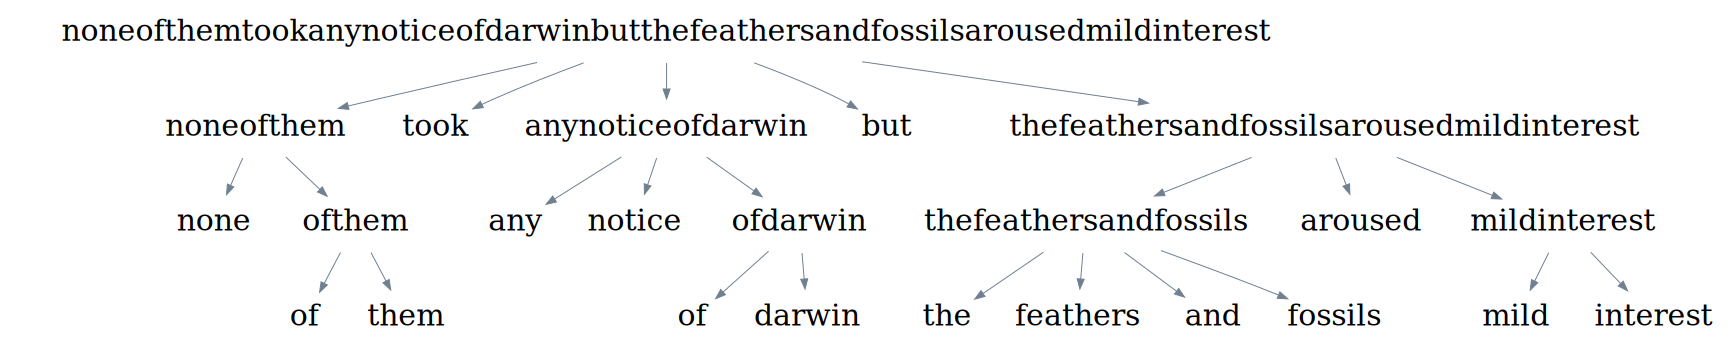

In [13]:
print(phrases_nodes)
test.chain.segment("ud").plot()

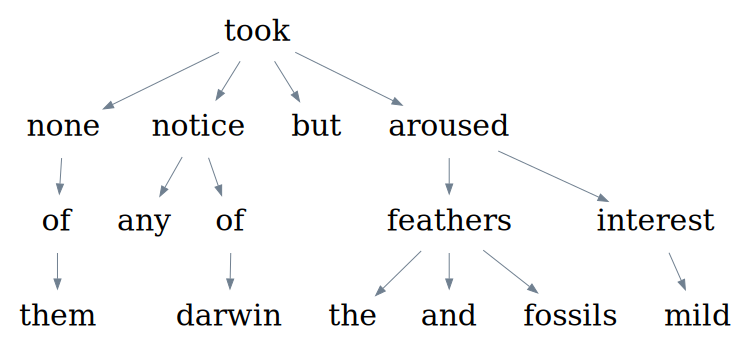

In [14]:
test.chain.segment("ud_original").plot()

0.2


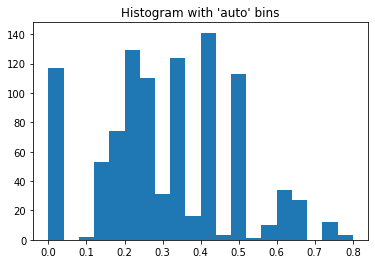

In [14]:
from statistics import mean,median,mode
sum([i for i in collect_phrase_cp if i==1])

import matplotlib.pyplot as plt
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),rng.normal(loc=5, scale=2, size=1000)))

print(mode(collect_phrase_cp))

_ = plt.hist(collect_phrase_cp, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [7]:
HO_types = []
phrases_strings = [" ".join([" ".join(phrases[j].keys()) if j!=i else "[MASK]" for j in range(len(phrases))]) for i in range(len(phrases))]
for sent in phrases_strings:

    HO_types.append([i["token_str"] for i in semiotic.unmasker(sent)])

slg.util_g.df(HO_types)

,0,1,2,3,4
0,casualties,claims,continued,",",.
1,victory,still,",",.,;
2,losses,reportedly,continues,;,:
3,targets,has,remains,yet,—
4,gains,claim,stands,elusive,…
...,...,...,...,...,...
95,execution,charges,raged,except,。
96,pursuit,signals,emerged,fate,hence
97,aim,routes,!,!,preceding
98,goals,there,counts,impossible,given


In [185]:
semiotic.unmasker(sent)[0][]

{'sequence': 'hymns for example were written as a mythological expression of the gospel story',
 'score': 0.14037135243415833,
 'token': 17777,
 'token_str': 'hymns'}

fagin was the only other person in the room and he was boiling coffee in a pan


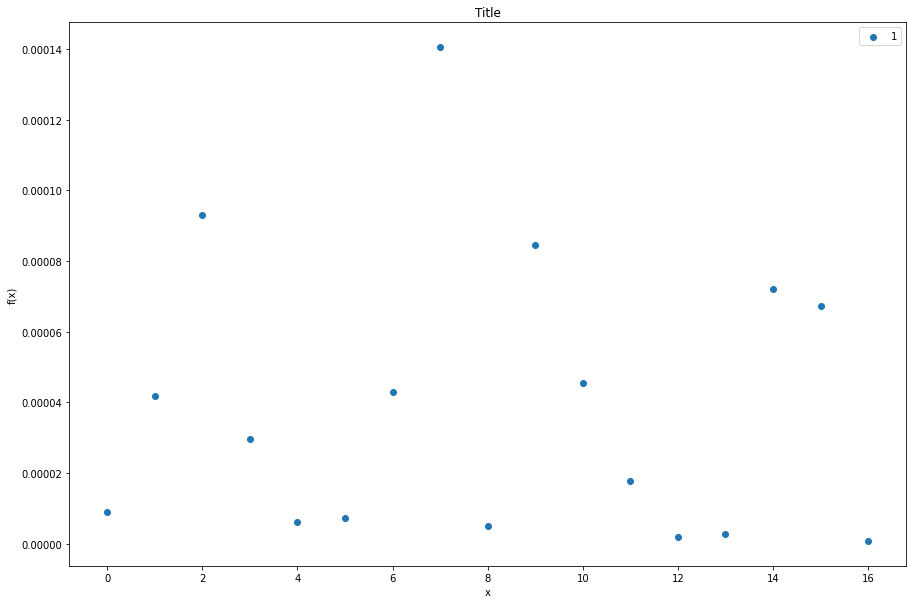

In [163]:
slg.util_g.scatter_plot([
    [p.func_score_s  for p in test.paradigm],
    # [p.mass for p in test.paradigm]
    ]
    ).plot()
print(test.chain.raw)

In [75]:
list(score_maxs[0])

[2, 5, 9, 12, 16]

In [42]:
from pandas import DataFrame as df
print(test.chain.raw)
slg.util_g.clear_df(df([p.keys_t_soft for p in test.paradigm],index=[f"{t} ({round(p.func_score_s*1000,3)})" for t,p in zip(test.chain.split,test.paradigm)]).T)

november 4 the dream turns sour leeds are knocked out of europe by rangers


,november (0.008),4 (0.008),the (0.009),dream (0.003),turns (0.003),sour (0.087),leeds (0.003),are (0.037),knocked (0.001),out (0.016),of (0.078),europe (0.005),by (0.073),rangers (0.001)
0,round,28,—,season,##works,against,angels,were,kicked,out,across,contention,by,leeds
1,may,19,vs,weather,##land,out,##s,are,knocked,off,in,playoffs,via,wolves
2,game,29,@,league,##time,on,reds,united,swept,clear,throughout,promotion,against,phoenix
3,episode,14,celtic,game,##coat,fc,dreams,fc,chased,outside,of,favour,behind,tnt
4,april,26,2018,final,league,away,##dies,bulldogs,driven,ahead,from,competition,with,default
5,day,27,leeds,winner,##card,to,spirits,rangers,taken,champions,to,play,after,liverpool
6,season,22,2009,series,club,down,they,reds,blown,queen,for,playoff,at,|
7,june,4,*,mighty,##world,at,##ers,narrowly,sent,champion,into,action,to,avalanche
8,stage,12,2007,premiership,against,onto,rangers,city,drafted,tour,outside,relegation,as,cinderella
9,october,21,2017,ball,makers,into,hearts,is,forced,north,central,existence,champions,england


In [15]:
slg.util_g.df([p.keys_t for p in test.paradigm],index=[f"{t} ({round(p.func_score*1000,3)} {i})" for t,p,i in zip(test.chain.split,test.paradigm,range(len(test.chain.split)))])

TypeError: df() got an unexpected keyword argument 'index'

In [22]:
semiotic.vocab.prob["and"]

0.007703130631002905

In [ ]:
import spacy
import benepar

nlp_ud = spacy.load("en_core_web_sm")

nlp_cp = spacy.load("en_core_web_sm")
nlp_cp.add_pipe("benepar", config={"model": "benepar_en3"})

In [ ]:

bla = list(nlp_cp(test.chain.raw).sents)[0]
terminal_bigrams = [c for c in list(bla._.constituents) if str(c).count(" ") == 1]
print(terminal_bigrams)
parad_analysis = [(p.entropy,p.mass,l) for l,p in zip(test.chain.split,test.paradigm)]
print(sorted(parad_analysis)[-len(terminal_bigrams):])
df(parad_analysis).T

In [6]:
print(test.chain.raw)
slg.util_g.clear_df(df([list(p.keys_t) for p in test.paradigm]).T)

she did nt go straight from the house to the station hotel


,0,1,2,3,4,5,6,7,8,9,10,11
0,neither,lets,,drive,straight,,custom,station,of,the,savoy,house
1,nor,can,,##t,directly,,customs,hotel,at,victoria,dorchester,##house
2,nobody,let,,##h,away,,somerset,subway,outside,paddington,hilton,##room
3,never,will,,walk,down,,burlington,airport,behind,waterloo,grand,office
4,so,wants,,runs,back,,parliament,train,to,railway,mayfair,building
...,...,...,...,...,...,...,...,...,...,...,...,...
95,,##ehan,,miles,daily,,coffee,jail,,harbour,kings,
96,,,,travelling,tram,,norfolk,street,,hamilton,greenwich,
97,,,,shopping,,,wesley,gates,,railroad,courtyard,
98,,,,##se,,,ferry,village,,dorchester,paris,


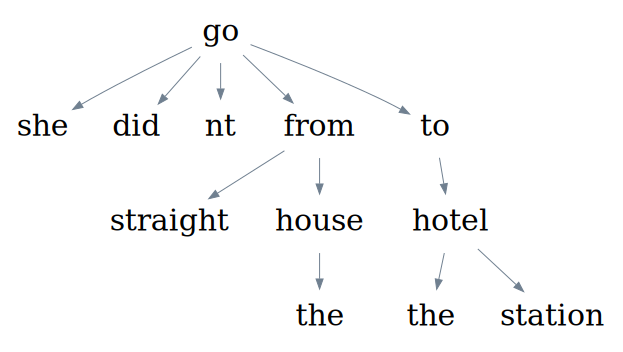

In [7]:
test.chain.segment("ud").plot()

In [34]:
for p in range(len(test.chain.split)):
    parad_k = test.paradigm[p].keys_t

    len_parad = len(parad_k)

    for n in range(1,5):
        counter = Counter([k[-n:] for k in parad_k]).most_common(5)
        print([(k,v/len_parad) for k,v in counter if v/len_parad>.1])
    print("*************")

[('s', 0.22340425531914893), ('e', 0.2127659574468085), ('y', 0.11702127659574468), ('r', 0.10638297872340426)]
[]
[]
[]
*************
[('s', 0.4375), ('d', 0.2708333333333333)]
[('es', 0.15625), ('ed', 0.15625)]
[]
[]
*************
[]
[]
[]
[]
*************
[('s', 0.26262626262626265), ('g', 0.1414141414141414)]
[('ng', 0.13131313131313133)]
[('ing', 0.13131313131313133)]
[]
*************
[('g', 0.18556701030927836), ('e', 0.12371134020618557), ('t', 0.1134020618556701), ('y', 0.1134020618556701), ('d', 0.10309278350515463)]
[('ng', 0.18556701030927836)]
[('ing', 0.17525773195876287)]
[]
*************
[]
[]
[]
[]
*************
[('e', 0.18), ('n', 0.15), ('r', 0.11)]
[('on', 0.12)]
[]
[]
*************
[('e', 0.18), ('n', 0.11), ('l', 0.11), ('y', 0.11), ('t', 0.11)]
[]
[]
[]
*************
[('f', 0.16666666666666666), ('t', 0.16666666666666666), ('e', 0.16666666666666666), ('d', 0.16666666666666666), ('o', 0.16666666666666666)]
[('of', 0.16666666666666666), ('at', 0.16666666666666666), 

In [25]:
test_sent = random.sample(test_sents,50)

collect = slg.util_g.multiprocessing(semiotic,test_sent)

In [27]:
from tqdm.notebook import tqdm

collect2 = []
for sent in tqdm(test_sent):
    collect2.append(semiotic(sent))

In [1]:
from collections import Counter
bla = Counter()
for s in collect2:
    for p in s.paradigm:
        bla[p.keys]+=1

# bla.most_common(20)


NameError: name 'collect2' is not defined